







































































































# Bibliotecas

In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura

In [2]:
SEED = 10
np.random.seed(SEED)

In [3]:
df = pd.read_csv("/home/pedro/Documentos/024.2/icdados/data/data_base/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Questão 1

In [4]:
scaler = StandardScaler()
arr = scaler.fit_transform(df)
features = arr[:, :-1]
target = arr[:, -1]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [5]:
df_r2_alphas = pd.DataFrame(columns=['method', 'alphas', 'r2'])

# Avaliando Lasso e Ridge para diferentes valores de alpha
for alphas in range(5, 51, 5):
    alphas *= 0.01
    
    # Lasso
    lasso = Lasso(alpha=alphas)
    lasso.fit(x_train, y_train)
    y_pred_lasso = lasso.predict(x_test)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    
    # Ridge
    ridge = Ridge(alpha=alphas)
    ridge.fit(x_train, y_train)
    y_pred_ridge = ridge.predict(x_test)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    
    # Salvando os resultados no DataFrame
    df_r2_alphas.loc[len(df_r2_alphas)] = ["lasso", alphas, r2_lasso]
    df_r2_alphas.loc[len(df_r2_alphas)] = ["ridge", alphas, r2_ridge]


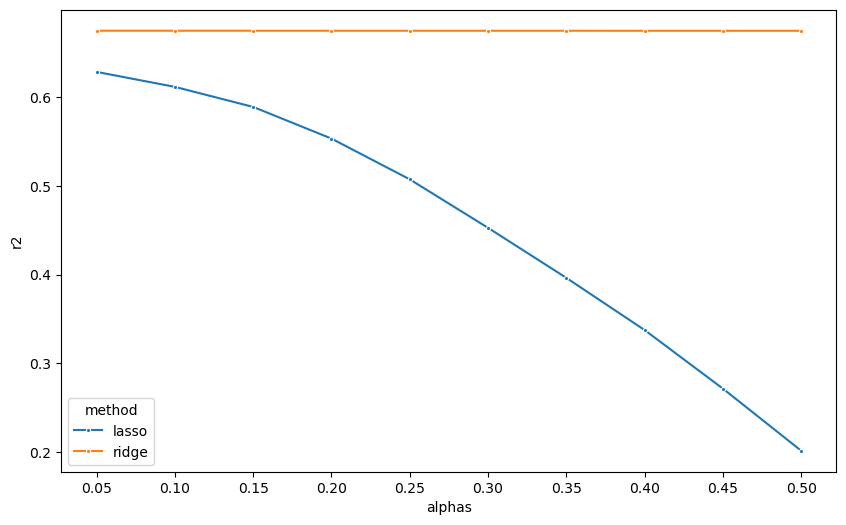

In [6]:
plt.figure(figsize=(10, 6))
plt.xticks([x * 0.01 for x in range(0, 51, 5)])
sns.lineplot(x='alphas', y='r2', data=df_r2_alphas, hue='method', marker='.')
plt.show()

In [7]:
df_lasso = df_r2_alphas[df_r2_alphas['method'] == 'lasso']
alpha_max_lasso = df_lasso.loc[df_lasso['r2'].idxmax(), 'alphas']

df_ridge = df_r2_alphas[df_r2_alphas['method'] == 'ridge']
alpha_max_ridge = df_ridge.loc[df_ridge['r2'].idxmax(), 'alphas']

## Lasso

In [8]:
lasso = Lasso(alpha=alpha_max_lasso)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
r2_lasso = r2_score(y_test, y_pred_lasso)


## Ridge

In [9]:
ridge = Ridge(alpha=alpha_max_ridge)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

## Reg Lin

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
r2_lr = r2_score(y_test, y_pred_lr)

In [11]:
print(f"LASSO\nAlpha = {alpha_max_lasso}\nR² = {r2_lasso:.4f}\n")
print(f"RIDGE\nAlpha = {alpha_max_ridge}\nR² = {r2_ridge:.4f}\n")
print(f"Reg\nR² = {r2_lr:.4f}")

LASSO
Alpha = 0.05
R² = 0.6282

RIDGE
Alpha = 0.05
R² = 0.6746

Reg
R² = 0.6746


# Questão 2

In [12]:
lasso = Lasso(alpha=0.05)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
coef = lasso.coef_

In [13]:
for a, b in zip(df.columns, coef):
    print(a,b)

crim -0.04259174139224468
zn 0.0
indus -0.0
chas 0.00106419195923162
nox -0.0
rm 0.3180167836450123
age -0.0
dis -0.02389589582617048
rad -0.0
tax -0.0
ptratio -0.16374465403771168
b 0.09948540758673205
lstat -0.3866776986834607


# Questão 3

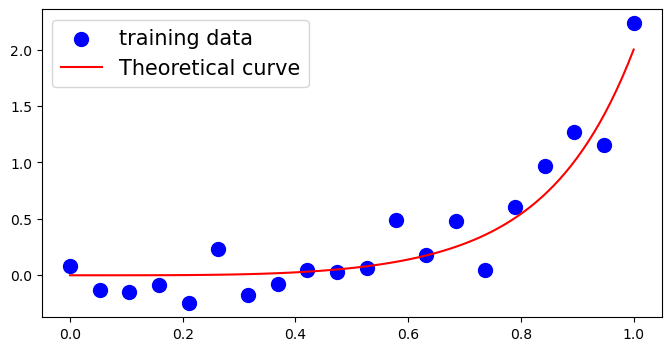

In [14]:
def function(x):
    y = x**4 + x**9
    return y
N_train = 20
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) + np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r', label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

## Y Test  e MSE

In [15]:
def polynomial_ridge_regression(degree, alphas):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alphas))
    model.fit(x_train, y_train)
    y_test_pred = model.predict(xt.reshape(-1, 1))

    mse = mean_squared_error(yt, y_test_pred)
    
    return y_test_pred, mse

## MSE results

In [16]:
for degree in range(1, 8):
    y_pred, mse = polynomial_ridge_regression(degree, alphas=0.1)
    print(f"Degree = {degree}\nMSE = {mse}\n")

Degree = 1
MSE = 0.08905615661288419

Degree = 2
MSE = 0.03863751799795403

Degree = 3
MSE = 0.02062206179117831

Degree = 4
MSE = 0.012801506519866486

Degree = 5
MSE = 0.008740025846528634

Degree = 6
MSE = 0.006499880849646288

Degree = 7
MSE = 0.005249688892060683



## Plot

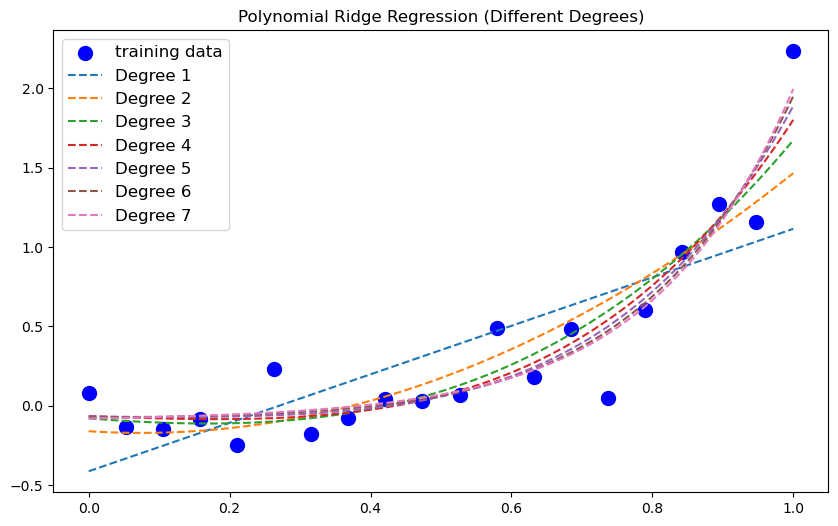

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="training data")

for degree in range(1, 8):
    y_pred, mse = polynomial_ridge_regression(degree, alphas=0.1)
    plt.plot(xt, y_pred, '--', label=f"Degree {degree}")


plt.legend(fontsize=12)
plt.title("Polynomial Ridge Regression (Different Degrees)")
plt.show()


# Questão 4

In [18]:
data = pd.read_csv("/home/pedro/Documentos/024.2/icdados/data/data_base/Vehicle.csv")
data.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [19]:
y = data['Class']
X = data.drop('Class', axis=1)  
encoder = {x: i+1 for i, x in enumerate(y.unique())}
y = y.map(encoder)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()

param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['lbfgs', 'liblinear'] 
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)


In [23]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

## Parâmetros para Regressão Logística:

In [24]:
print("\nDesempenho da Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Acurácia:", accuracy_score(y_test, y_pred_log_reg))

Melhores parâmetros para Regressão Logística: {'C': 0.1, 'solver': 'liblinear'}

Desempenho da Regressão Logística:
              precision    recall  f1-score   support

           1       0.93      0.97      0.95        40
           2       0.70      0.54      0.61        48
           3       0.88      1.00      0.94        52
           4       0.59      0.63      0.61        30

    accuracy                           0.80       170
   macro avg       0.78      0.79      0.78       170
weighted avg       0.79      0.80      0.79       170

Acurácia: 0.8


## Parâmetros para KNN:

In [25]:
print("\nDesempenho do KNN:")
print(classification_report(y_test, y_pred_knn))
print("Acurácia:", accuracy_score(y_test, y_pred_knn))

Melhores parâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Desempenho do KNN:
              precision    recall  f1-score   support

           1       0.84      0.95      0.89        40
           2       0.53      0.52      0.53        48
           3       0.91      0.83      0.87        52
           4       0.32      0.33      0.33        30

    accuracy                           0.68       170
   macro avg       0.65      0.66      0.65       170
weighted avg       0.69      0.68      0.68       170

Acurácia: 0.6823529411764706


# Questão 5

In [26]:
df_wine = pd.read_csv("/home/pedro/Documentos/024.2/icdados/data/data_base/winequality-red.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
for col in df_wine.columns:
    print(df_wine[col].describe(), end="\n\n")

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlo

## Modelo

In [28]:
X, y = df_wine.drop('quality', axis=1), df_wine['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
results = {}

for n_folds in range(2, 41, 2):
    scores = cross_val_score(log_reg, X_scaled, y, cv=n_folds, scoring='accuracy')
    results[n_folds] = scores.mean()

In [30]:
for n_folds, accuracy in results.items():
    print(f"{n_folds} folds \nAccuracy {accuracy:.3f}")

2 folds 
Accuracy 0.561
4 folds 
Accuracy 0.574
6 folds 
Accuracy 0.580
8 folds 
Accuracy 0.582
10 folds 
Accuracy 0.590
12 folds 
Accuracy 0.587
14 folds 
Accuracy 0.591
16 folds 
Accuracy 0.596
18 folds 
Accuracy 0.595
20 folds 
Accuracy 0.592
22 folds 
Accuracy 0.593
24 folds 
Accuracy 0.591
26 folds 
Accuracy 0.592
28 folds 
Accuracy 0.596
30 folds 
Accuracy 0.593
32 folds 
Accuracy 0.592
34 folds 
Accuracy 0.591
36 folds 
Accuracy 0.593
38 folds 
Accuracy 0.593
40 folds 
Accuracy 0.594
